In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# Draw inline
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

# information functions 

In [51]:
def showInformation(df):
  print('\n shape of data : \n', df.shape)
  print('\n columns : \n',df.columns)
  print('\n dataset info : \n', df.info())
  print('\n dataset datatypes : \n', df.dtypes)
  if df.isnull().values.any():
    print('\n sum of null values : \n' , df.isnull().sum())
  else:
    print("\n This dataset has no null values amongst its features.")

def getdataCount(columns,df):
  for column in columns:
    print('\n {} : \n {}'.format(column,df[column].value_counts()))

def getUniqueValue(columns,df):
  for column in columns:
    print('\n {} : \n {}'.format(column,df[column].unique()))

def checkifUnkown(df):
  features = df.columns
  for feature in features:
    if((df[feature] =='-unknown-').any() ) :
      print(feature)




# draw functions

In [3]:
def BoxPlot(feature,df):
    plt.figure(figsize=(8,6))
    plt.boxplot(df[feature], flierprops=dict(markerfacecolor='b', marker='o'), showfliers=True, vert=True)
    plt.title(feature+' Box Plot', size=16)
    plt.show() 

def histPlot(feature,df,rang):
    plt.hist(df[feature], range=[rang[0], rang[1]])
    plt.title(feature)
    plt.show()

#Data Exploration


# Age dataset

In [4]:
df_age_gender = pd.read_csv('/content/drive/My Drive/vodafoneTask/datasets/age_gender_bkts.csv')

In [5]:
df_age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [6]:
showInformation(df_age_gender)


 shape of data : 
 (420, 5)

 columns : 
 Index(['age_bucket', 'country_destination', 'gender',
       'population_in_thousands', 'year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB

 dataset info : 
 None

 dataset datatypes : 
 age_bucket                  object
country_destination         object
gender                      object
population_in_thousands    float64
year                       float64
dtype: object

 This dataset has no null values amongst its features.


**convert the age bucket column to numerical by Get the mean age for the age bucket range **



In [7]:
df_age_gender['age_bucket'] = df_age_gender['age_bucket'].apply(lambda x: '100-104' if x == '100+' else x)
#get mean age 
df_age_gender['mean_age'] = df_age_gender['age_bucket'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1]))/2 )
df_age_gender

,age_bucket,country_destination,gender,population_in_thousands,year,mean_age
0,100-104,AU,male,1.0,2015.0,102.0
1,95-99,AU,male,9.0,2015.0,97.0
2,90-94,AU,male,47.0,2015.0,92.0
3,85-89,AU,male,118.0,2015.0,87.0
4,80-84,AU,male,199.0,2015.0,82.0
...,...,...,...,...,...,...
415,95-99,US,male,115.0,2015.0,97.0
416,90-94,US,male,541.0,2015.0,92.0
417,15-19,US,female,10570.0,2015.0,17.0
418,85-89,US,male,1441.0,2015.0,87.0


In [8]:
df_age_gender=df_age_gender.drop('age_bucket', axis=1)
df_age_gender

,country_destination,gender,population_in_thousands,year,mean_age
0,AU,male,1.0,2015.0,102.0
1,AU,male,9.0,2015.0,97.0
2,AU,male,47.0,2015.0,92.0
3,AU,male,118.0,2015.0,87.0
4,AU,male,199.0,2015.0,82.0
...,...,...,...,...,...
415,US,male,115.0,2015.0,97.0
416,US,male,541.0,2015.0,92.0
417,US,female,10570.0,2015.0,17.0
418,US,male,1441.0,2015.0,87.0


In [9]:
getdataCount(['country_destination','year','gender'],df_age_gender)


 country_destination : 
 NL    42
PT    42
ES    42
AU    42
IT    42
GB    42
FR    42
US    42
CA    42
DE    42
Name: country_destination, dtype: int64

 year : 
 2015.0    420
Name: year, dtype: int64

 gender : 
 female    210
male      210
Name: gender, dtype: int64


```
# There is only value available for the year feature , it doesn't add any 
information  so we can drop it
```



In [10]:
df_age_gender=df_age_gender.drop('year', axis=1)
df_age_gender

,country_destination,gender,population_in_thousands,mean_age
0,AU,male,1.0,102.0
1,AU,male,9.0,97.0
2,AU,male,47.0,92.0
3,AU,male,118.0,87.0
4,AU,male,199.0,82.0
...,...,...,...,...
415,US,male,115.0,97.0
416,US,male,541.0,92.0
417,US,female,10570.0,17.0
418,US,male,1441.0,87.0


In [11]:
df_age_gender.to_csv("/content/drive/My Drive/vodafoneTask/datasets/dataset-modified/age-gender-population.csv", index=False)

# Sessions dataset

In [12]:
df_sessions = pd.read_csv("/content/drive/My Drive/vodafoneTask/datasets/sessions.csv")
df_sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [13]:
showInformation(df_sessions)


 shape of data : 
 (10567737, 6)

 columns : 
 Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB

 dataset info : 
 None

 dataset datatypes : 
 user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

 sum of null values : 
 user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64


In [14]:
getUniqueValue(df_sessions.columns,df_sessions)


 user_id : 
 ['d1mm9tcy42' 'yo8nz8bqcq' '4grx6yxeby' ... 'fa6260ziny' '87k0fy4ugm'
 '9uqfg8txu3']

 action : 
 ['lookup' 'search_results' 'personalize' 'index' 'similar_listings'
 'ajax_refresh_subtotal' 'show' 'header_userpic' 'ask_question' nan
 'other_hosting_reviews_first' 'hosting_social_proof' 'decision_tree'
 'recent_reservations' 'faq_experiment_ids' 'multi' 'active' 'dashboard'
 'create' 'confirm_email' 'show_personalize' 'verify' 'pending'
 'requested' 'concierge' 'faq' 'clear_reservation' 'cancellation_policies'
 'track_page_view' 'update' 'my' 'campaigns' 'notifications' 'listings'
 'unavailabilities' 'ajax_lwlb_contact' 'ajax_check_dates' 'qt2'
 'request_new_confirm_email' 'ajax_photo_widget_form_iframe'
 'facebook_auto_login' 'identity' 'qt_reply_v2' 'travel_plans_current'
 'complete_status' 'populate_from_facebook' 'kba_update' 'kba' 'login'
 'authenticate' 'calendar_tab_inner2' 'other_hosting_reviews'
 'social_connections' 'relationship' '15' 'collections' '12'
 'jumio

In [15]:
getdataCount(['action','action_type','action_detail'],df_sessions)


 action : 
 show              2768278
index              843699
search_results     725226
personalize        706824
search             536057
                   ...   
deauthorize             1
plaxo_cb                1
reactivate              1
sldf                    1
deactivate              1
Name: action, Length: 359, dtype: int64

 action_type : 
 view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

 action_detail : 
 view_search_results         1776885
p3                          1376550
-unknown-                   1031141
wishlist_content_update      706824
user_profile                 656839
                             ...   
special_offer_field               3
host_refund_guest                 2
host_respond_page      

**replace unkown with null **

In [16]:
df_sessions['action'] = df_sessions['action'].replace('-unknown-', np.nan)
df_sessions['action_type'] = df_sessions['action_type'].replace('-unknown-', np.nan)
df_sessions['action_detail'] = df_sessions['action_detail'].replace('-unknown-', np.nan)

In [17]:
df_sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


secs_elapsed Distribution

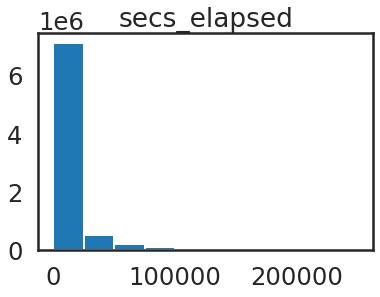

In [18]:
df_sessionNotnull = df_sessions.dropna()
histPlot('secs_elapsed',df_sessionNotnull,[0,250000])

In [19]:
df_sessions.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


The average number of seconds is 19450 seconds whereas the median value is 1147 seconds. and also  figure ,This suggests theres a right skewed so we shall fill null values with median

In [20]:
#median_secs = df_sessions['secs_elapsed'].median()
#df_sessions['secs_elapsed'] = df_sessions['secs_elapsed'].fillna(median_secs)

In [21]:
#df_sessions.describe()

In [22]:
df_sessions.to_csv("/content/drive/My Drive/vodafoneTask/datasets/dataset-modified/sessions-v1.csv", index=False)

# Country dataset

In [23]:
df_countries =pd.read_csv("/content/drive/My Drive/vodafoneTask/datasets/countries.csv")
df_countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


# train dataset

In [24]:
df_train_users = pd.read_csv('/content/drive/My Drive/vodafoneTask/datasets/train_users.csv')
df_train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [25]:
showInformation(df_train_users)


 shape of data : 
 (213451, 16)

 columns : 
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   

In [26]:
checkifUnkown(df_train_users)

gender
first_browser


In [27]:
df_train_users['gender'] = df_train_users['gender'].replace('-unknown-', np.nan)
df_train_users['first_browser'] = df_train_users['first_browser'].replace('-unknown-', np.nan)

In [28]:
df_train_users.age.describe()


count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

age must be between 18 and 110

In [29]:
df_train_users.loc[df_train_users.age > 110, 'age'] = np.nan
df_train_users.loc[df_train_users.age < 18, 'age'] = np.nan

In [30]:
df_train_users.age.describe()

count    124502.000000
mean         37.431551
std          13.897949
min          18.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         110.000000
Name: age, dtype: float64

In [31]:
df_train_users.to_csv("/content/drive/My Drive/vodafoneTask/datasets/dataset-modified/train_users-V1.csv", index=False)

## Data Correlation

In [32]:
df_train_usersV1 = pd.read_csv("/content/drive/My Drive/vodafoneTask/datasets/dataset-modified/train_users-V1.csv")
df_train_usersV1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [33]:
df_train_usersV1['gender'].value_counts()

FEMALE    63041
MALE      54440
OTHER       282
Name: gender, dtype: int64

In [34]:
df_train_usersV1.shape

(213451, 16)

In [35]:
df_train_usersV1_copy = df_train_usersV1.copy()

In [36]:
indexs = df_train_usersV1_copy[df_train_usersV1_copy.gender.isnull() == True].index
df_train_usersV1_copy.drop(indexs , inplace=True)
df_train_usersV1_copy=df_train_usersV1_copy[df_train_usersV1_copy.gender != 'OTHER']
df_train_usersV1_copy=df_train_usersV1_copy[df_train_usersV1_copy.affiliate_provider != 'other']
df_train_usersV1_copy=df_train_usersV1_copy[df_train_usersV1_copy.country_destination  != 'other']
df_train_usersV1_copy=df_train_usersV1_copy[df_train_usersV1_copy.country_destination  != 'NDF']
df_train_usersV1_copy=df_train_usersV1_copy[df_train_usersV1_copy.affiliate_channel   != 'other']
df_train_usersV1_copy.shape

(48497, 16)

In [37]:
getUniqueValue(['gender','signup_method','affiliate_channel','affiliate_provider','signup_app','country_destination'],df_train_usersV1_copy)


 gender : 
 ['FEMALE' 'MALE']

 signup_method : 
 ['basic' 'facebook' 'google']

 affiliate_channel : 
 ['direct' 'seo' 'content' 'sem-non-brand' 'sem-brand' 'remarketing']

 affiliate_provider : 
 ['direct' 'google' 'facebook' 'vast' 'bing' 'yahoo' 'gsp' 'baidu' 'naver'
 'yandex']

 signup_app : 
 ['Web' 'iOS' 'Moweb' 'Android']

 country_destination : 
 ['US' 'CA' 'FR' 'IT' 'GB' 'NL' 'ES' 'DE' 'AU' 'PT']


In [38]:
df_train_usersV1_copy.country_destination.value_counts()

US    38120
FR     3141
IT     1696
GB     1483
ES     1449
CA      861
DE      730
NL      503
AU      374
PT      140
Name: country_destination, dtype: int64

convert data to numerical to get corrolation

In [39]:
df_train_usersV1_copy['gender'] = df_train_usersV1_copy['gender'].map({'FEMALE':0, 'MALE':1})
df_train_usersV1_copy['signup_method '] = df_train_usersV1_copy['signup_method'].map({'facebook':0, 'basic':1, 'google':2})
df_train_usersV1_copy['affiliate_channel '] = df_train_usersV1_copy['affiliate_channel'].map({'seo':0, 'direct':1, 'sem-non-brand':2, 'content':3,
                                                                                              'sem-brand':4,'remarketing':5,'api':6})
df_train_usersV1_copy['signup_app '] = df_train_usersV1_copy['signup_app'].map({'Web':0, 'Moweb':1, 'iOS':2,'Android':3})
df_train_usersV1_copy['country_destination'] = df_train_usersV1_copy['country_destination'].map({'US':0, 'CA':1, 'FR':2, 'IT':3,
                                                                                              'ES':4,'GB':5,'PT':6,'NL':7,'DE':8,'AU':9})
df_train_usersV1_copy['affiliate_provider'] = df_train_usersV1_copy['affiliate_provider'].map({'google':0, 'direct':1, 'craigslist':2, 'facebook':3,
                                                                                              'vast':4,'bing':5,'meetup':6,'facebook-open-graph':7,'email-marketing':8,'yahoo':9,
                                                                                               'padmapper':10,'wayn':11,'gsp':12,'baidu':13,'naver':14,'yandex':15})

In [40]:
indexs = df_train_usersV1_copy[df_train_usersV1_copy.age.isnull() == True].index
df_train_usersV1_copy.drop(indexs , inplace=True)
df_train_usersV1_copy.shape

(45578, 19)

In [41]:
showInformation(df_train_usersV1_copy)


 shape of data : 
 (45578, 19)

 columns : 
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'signup_method ',
       'affiliate_channel ', 'signup_app '],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45578 entries, 2 to 213445
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       45578 non-null  object 
 1   date_account_created     45578 non-null  object 
 2   timestamp_first_active   45578 non-null  int64  
 3   date_first_booking       45578 non-null  object 
 4   gender                   45578 non-null  int64  
 5   age                      45578 non-null  float64
 6   sig

## HeatMap

In [46]:
corr_matrix=df_train_usersV1_copy.corr()
corr_matrix

,timestamp_first_active,gender,age,signup_flow,affiliate_provider,country_destination,signup_method,affiliate_channel,signup_app
timestamp_first_active,1.000000,0.004707,-0.065968,0.142718,-0.026613,-0.037432,0.062647,0.107094,0.204199
gender,0.004707,1.000000,0.034376,0.006239,0.013187,-0.000852,-0.052992,-0.045574,0.019406
age,-0.065968,0.034376,1.000000,-0.063568,-0.020515,0.021403,0.081930,0.111955,-0.065360
signup_flow,0.142718,0.006239,-0.063568,1.000000,0.055938,-0.032285,0.097148,-0.118544,0.901601
affiliate_provider,-0.026613,0.013187,-0.020515,0.055938,1.000000,-0.007110,-0.011354,-0.374739,0.056121
country_destination,-0.037432,-0.000852,0.021403,-0.032285,-0.007110,1.000000,-0.003953,0.010033,-0.035657
signup_method,0.062647,-0.052992,0.081930,0.097148,-0.011354,-0.003953,1.000000,0.011383,0.084745
affiliate_channel,0.107094,-0.045574,0.111955,-0.118544,-0.374739,0.010033,0.011383,1.000000,-0.111517
signup_app,0.204199,0.019406,-0.065360,0.901601,0.056121,-0.035657,0.084745,-0.111517,1.000000


In [47]:
corr_matrix['country_destination'].sort_values(ascending=False)

country_destination       1.000000
age                       0.021403
affiliate_channel         0.010033
gender                   -0.000852
signup_method            -0.003953
affiliate_provider       -0.007110
signup_flow              -0.032285
signup_app               -0.035657
timestamp_first_active   -0.037432
Name: country_destination, dtype: float64

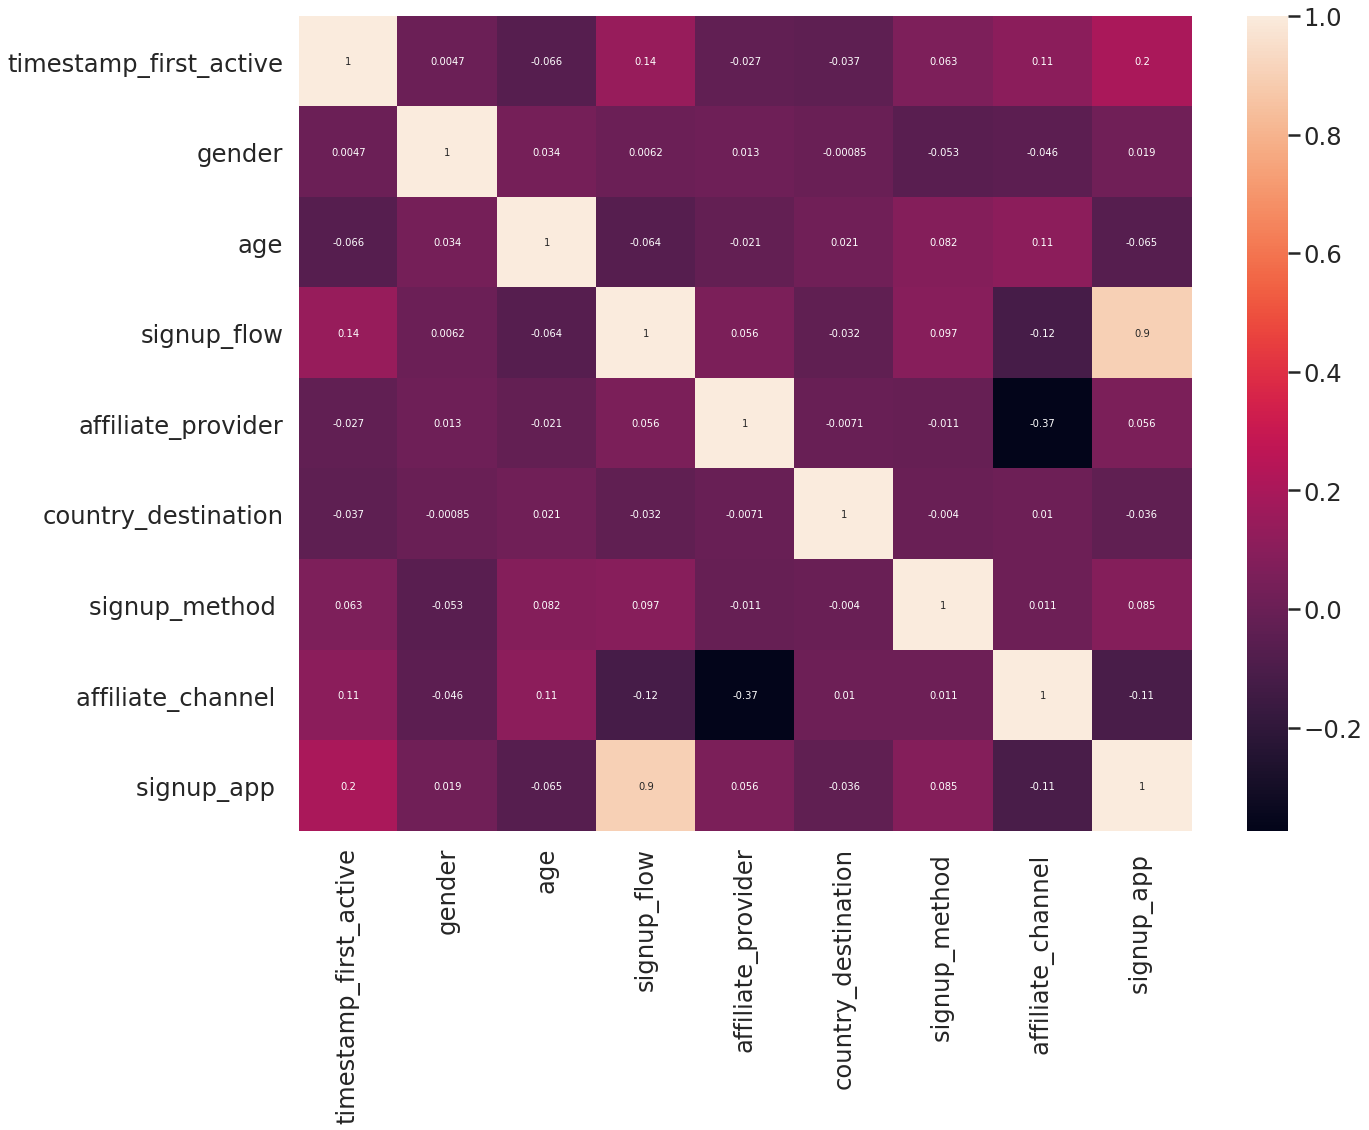

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train_usersV1_copy.corr(),annot=True)

# prepare Main data for visualization

In [85]:
df_train_users = pd.read_csv("/content/drive/My Drive/vodafoneTask/datasets/train_users.csv") 
df_test_users = pd.read_csv("/content/drive/My Drive/vodafoneTask/datasets/test_users.csv")
df_train_users.shape , df_test_users.shape 

((213451, 16), (62096, 15))

In [86]:
df_train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [87]:
df_test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [88]:
train_country_destination = df_train_users['country_destination'].values
test_users_id = df_test_users.id

df_all_users =pd.concat((df_train_users, df_test_users), axis = 0, ignore_index = True, sort = True)
df_all_users.shape

(275547, 16)

In [89]:
df_all_users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [90]:
df_all_users.columns

Index(['affiliate_channel', 'affiliate_provider', 'age', 'country_destination',
       'date_account_created', 'date_first_booking', 'first_affiliate_tracked',
       'first_browser', 'first_device_type', 'gender', 'id', 'language',
       'signup_app', 'signup_flow', 'signup_method', 'timestamp_first_active'],
      dtype='object')

In [91]:
df_all_users.shape

(275547, 16)

In [93]:
showInformation(df_all_users)


 shape of data : 
 (275547, 16)

 columns : 
 Index(['affiliate_channel', 'affiliate_provider', 'age', 'country_destination',
       'date_account_created', 'date_first_booking', 'first_affiliate_tracked',
       'first_browser', 'first_device_type', 'gender', 'id', 'language',
       'signup_app', 'signup_flow', 'signup_method', 'timestamp_first_active'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   affiliate_channel        275547 non-null  object 
 1   affiliate_provider       275547 non-null  object 
 2   age                      158681 non-null  float64
 3   country_destination      213451 non-null  object 
 4   date_account_created     275547 non-null  object 
 5   date_first_booking       88908 non-null   object 
 6   first_affiliate_tracked  269462 non-null  object 
 7   first_b

In [94]:
df_all_users = df_all_users.drop(['id','country_destination','date_first_booking'], axis = 1)
df_all_users.shape

(275547, 13)

In [96]:
df_all_users.loc[df_all_users.age > 110, 'age'] = np.nan
df_all_users.loc[df_all_users.age < 18, 'age'] = np.nan

In [97]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method',
    'signup_flow'
]

for categorical_feature in categorical_features:
    df_all_users[categorical_feature] = df_all_users[categorical_feature].astype('category')

In [98]:
df_all_users['date_account_created'] = pd.to_datetime(df_all_users['date_account_created'])
df_all_users['timestamp_first_active'] = pd.to_datetime(df_all_users['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [99]:
df_all_users.head()

,affiliate_channel,affiliate_provider,age,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,2011-05-25,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,2010-09-28,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,2009-12-08 06:11:05


In [100]:
df_all_users.to_csv("/content/drive/My Drive/vodafoneTask/datasets/mainDatasetVisual/all_users-visualization.csv", index=False)

In [101]:
df_train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [102]:
df_train_users.loc[df_train_users.age > 110, 'age'] = np.nan
df_train_users.loc[df_train_users.age < 18, 'age'] = np.nan

In [103]:
showInformation(df_train_users)


 shape of data : 
 (213451, 16)

 columns : 
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      124502 non-null  float64
 6   signup_method            213451 non-null  object 
 7   

In [104]:
df_train_users.to_csv("/content/drive/My Drive/vodafoneTask/datasets/mainDatasetVisual/train_users-visualization.csv", index=False)

In [ ]:
!jupyter nbconvert --to html /content/dataVisualization.ipynb